# Multiple Linear Regression

## Introduction

We have learned how to fit a simple linear regression model with a single independent variable. Now, we will extend this to multiple independent variables, which allows us to model more complex relationships and control for (i.e., consider) multiple factors simultaneously.

## Mathematical Formulation

### The Model

The multiple linear regression model takes the form:
$$y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \cdots + \beta_p x_{p} + \epsilon$$

where:
- $y$ is the response (dependent) variable
- $x_1, x_2, \cdots, x_p$ are the $p$ predictor (independent) variables
- $\beta_0$ is the intercept
- $\beta_1, \beta_2, \cdots, \beta_p$ are the regression coefficients
- $\epsilon$ is the error term

### Dataset Notation

For a dataset with $n$ observations, where each observation is indexed by $i$, we can write:
$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + \epsilon_i, \quad i = 1, 2, \cdots, n$$

where:
- $y_i$ is the response for the $i$-th observation
- $x_{ij}$ is the value of the $j$-th predictor for the $i$-th observation
- $\epsilon_i$ is the error term for the $i$-th observation

### Matrix Formulation

We can express the entire system of equations in compact matrix form:
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

where:
- $\mathbf{y}$ is an $n \times 1$ vector of responses:
  $$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$$

- $\mathbf{X}$ is an $n \times (p+1)$ matrix (including a column of 1s for the intercept):
  $$\mathbf{X} = \begin{bmatrix} 
  1 & x_{11} & x_{12} & \cdots & x_{1p} \\
  1 & x_{21} & x_{22} & \cdots & x_{2p} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{n1} & x_{n2} & \cdots & x_{np}
  \end{bmatrix}$$

- $\boldsymbol{\beta}$ is a $(p+1) \times 1$ vector of coefficients:
  $$\boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix}$$

- $\boldsymbol{\epsilon}$ is an $n \times 1$ vector of errors:
  $$\boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}$$

## Estimation: The Normal Equation

### Objective Function

To find the best-fitting coefficients, we minimize the sum of squared errors (SSE):
$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$$

### The Solution

Taking the derivative with respect to $\boldsymbol{\beta}$ and setting it to zero, we obtain the **normal equation**:
$$\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}$$

Solving for $\boldsymbol{\beta}$, we get the **least squares estimator**:
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

**Note**: This solution requires that $\mathbf{X}^T\mathbf{X}$ is invertible, which happens when the columns of $\mathbf{X}$ are linearly independent (no perfect multicollinearity).

## Statistical Properties

### Variance-Covariance Matrix

Under the standard assumptions of linear regression, the variance-covariance matrix of the coefficient estimates is:
$$\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$$

where $\sigma^2$ is the variance of the error terms.

Key insights:
- The **diagonal elements** give the variances of individual coefficients: $\text{Var}(\hat{\beta}_j)$
- The **off-diagonal elements** give the covariances between coefficient pairs: $\text{Cov}(\hat{\beta}_i, \hat{\beta}_j)$
- The **standard errors** are obtained by taking the square root of the diagonal elements: $\text{SE}(\hat{\beta}_j) = \sqrt{\text{Var}(\hat{\beta}_j)}$

### Estimating Variance of the error terms

Since $\sigma^2$ is typically unknown, we estimate it using the residual sum of squares (i.e., SSE after the model is fitted):
$$\hat{\sigma}^2 = \frac{\text{RSS}}{n - (p + 1)} = \frac{(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}})^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}})}{n - (p + 1)}$$

where $n - (p + 1)$ represents the degrees of freedom.

In [15]:
# Import necessary libraries for linear regression analysis
from typing import List

# Data manipulation and numerical computation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Progress bar for iterations
from tqdm import tqdm

# Configure visualization settings for better readability
sns.set_theme(font_scale=1.5)  # Increase font size for better visibility
sns.set_style("whitegrid", {"grid.linestyle": "--"})  # Set grid style with dashed lines
np.set_printoptions(
    precision=4,      # 4 decimal places
    suppress=True,    # No scientific notation for small numbers
    linewidth=100,    # Wider lines before wrapping
    threshold=20      # Show all elements if array has < 20 items
)

In [16]:
# Load the Auto MPG dataset from GitHub repository
# The dataset contains information about cars from the 1970s and 1980s
data = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/auto_mpg.csv")

# Let's drop any na values for now
data = data.dropna()

# Display the first 5 rows to understand the data structure
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Using matrix formulation to fit a simple linear regression model

In the following, we will use the matrix formulation to fit a simple linear regression model.

The result should be the same as the one we got in the previous section.

In [17]:
# Linear regression using matrix formulation
# This demonstrates the underlying linear algebra of regression

def linear_regression_matrix(
    data: pd.DataFrame,
    dependent_variable: str,
    independent_variables: List[str]
) -> np.array:
    """
    Fit a linear regression model using matrix formulation.

    Args:
        data: pd.DataFrame, the input data
        dependent_variable: str, the dependent variable, it must be a column name of the data
        independent_variables: List[str], the independent variables, it must be a list of column names of the data
    """
    # First column: all 1s for the intercept term
    # Remaining columns: the independent variables
    X = np.hstack(
        (np.ones(shape=(len(data[dependent_variable]), 1)),  # Column of 1s for intercept
        np.array(data[independent_variables]))
    )

    print("Data matrix X shape:", X.shape)
    print("First 5 rows of X:")
    print(X[:5])

    y = data["mpg"]

    # Calculate coefficients using the Normal Equation
    # β = (X'X)^(-1) X'y
    # This gives us the least squares solution
    XtX = X.T @ X  # X transpose times X
    XtX_inv = np.linalg.inv(XtX)  # Inverse of X'X
    Xty = X.T @ y  # X transpose times y
    beta_matrix = XtX_inv @ Xty

    # Calculate variance-covariance matrix
    # Var(β) = σ² (X'X)^(-1)
    # Where σ² is the residual variance
    residual = y - X @ beta_matrix
    sigma_squared = np.var(residual, ddof=2)
    var_cov_matrix = sigma_squared * XtX_inv

    # Extract standard errors (square root of diagonal elements)
    se_matrix = np.sqrt(np.diag(var_cov_matrix))

    print("\n" + "="*50)
    print("Coefficient Estimates (Matrix Method)")
    print("="*50)
    print(f"Intercept: {beta_matrix[0]:.4f}, with standard error {se_matrix[0]:.4f}")
    for i, var in enumerate(independent_variables):
        print(f"Slope for {var:<15}: {beta_matrix[i+1]:.4f}, with standard error {se_matrix[i+1]:.4f}")
    print(f"R-squared: {1 - np.var(residual, ddof=2) / np.var(y, ddof=2):.4f}")
    print(f"Sum of Squared Errors (SSE): {np.sum(residual**2):.4f}")
    print(f"Mean Squared Error (MSE): {np.mean(residual**2):.4f}")

    return beta_matrix


_ = linear_regression_matrix(data=data, dependent_variable="mpg", independent_variables=["weight"])

Data matrix X shape: (392, 2)
First 5 rows of X:
[[   1. 3504.]
 [   1. 3693.]
 [   1. 3436.]
 [   1. 3433.]
 [   1. 3449.]]

Coefficient Estimates (Matrix Method)
Intercept: 46.2165, with standard error 0.7987
Slope for weight         : -0.0076, with standard error 0.0003
R-squared: 0.6926
Sum of Squared Errors (SSE): 7321.2337
Mean Squared Error (MSE): 18.6766


## Using matrix formulation to fit a multiple linear regression model

In the following, we will consider more independent variables, from `weight`, `displacement`, `horsepower`, and `acceleration`,
to fit a multiple linear regression model to predict the dependent variable `mpg`.

In [18]:
# Let's first consider 2 independent variables: `weight` and `acceleration`, and
# visualize the fitted plane in the 3D space.

# Interactive 3D Visualization using Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

def interactive_3d_regression(
    data: pd.DataFrame,
    dependent_variable: str,
    independent_variables: List[str],
    betas: np.ndarray
) -> None:
    """Creates an interactive 3D visualization of the regression model."""
    assert len(independent_variables) == 2, "Only 2 independent variables are supported for 3D visualization"
    # Extract data
    X1 = data[independent_variables[0]].values
    X2 = data[independent_variables[1]].values
    y = data[dependent_variable].values

    # Create mesh grid for the surface
    X1_range = np.linspace(X1.min(), X1.max(), 50)
    X2_range = np.linspace(X2.min(), X2.max(), 50)
    X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
    y_mesh = betas[0] + betas[1] * X1_mesh + betas[2] * X2_mesh
    y_pred = betas[0] + betas[1] * X1 + betas[2] * X2

    # Create the figure
    fig = go.Figure()

    # Add the regression plane
    fig.add_trace(go.Surface(
        x=X1_mesh,
        y=X2_mesh,
        z=y_mesh,
        colorscale="RdBu",
        opacity=0.5,
        name="Regression Plane",
        showscale=False,
    ))

    # Add the actual data points
    fig.add_trace(go.Scatter3d(
        x=X1,
        y=X2,
        z=y,
        mode="markers",
        marker=dict(
            size=5,
            color=y,
            colorscale="Viridis",
            showscale=True,
            colorbar=dict(title=dependent_variable, x=1.1),
            line=dict(color="black", width=0.5)
        ),
        name="Actual Data",
        opacity=0.9,
        customdata=y_pred,
        hovertemplate="<b>Details</b><br>" +
                     f"{independent_variables[0]}: %{{x:.2f}}<br>" +
                     f"{independent_variables[1]}: %{{y:.2f}}<br>" +
                     f"Actual {dependent_variable}: %{{z:.2f}}<br>" +
                     f"Predicted {dependent_variable}: %{{customdata:.2f}}<extra></extra>"
    ))


    # Update layout
    fig.update_layout(
        title=dict(
            text=f"Interactive 3D Regression: {dependent_variable} ~ {independent_variables[0]} + {independent_variables[1]}",
            font=dict(size=16)
        ),
        scene=dict(
            xaxis_title=independent_variables[0],
            yaxis_title=independent_variables[1],
            zaxis_title=dependent_variable,
            xaxis=dict(autorange="reversed" if X1[0] > X1[-1] else True),
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
        ),
        autosize=True,
        width=None,  # Let Jupyter determine width
        height=900,
        showlegend=True,
        legend=dict(x=0.02, y=0.98),
        hovermode="closest"
    )

    fig.show()


betas =linear_regression_matrix(
    data=data,
    dependent_variable="mpg",
    independent_variables=["weight", "acceleration"],
)

# Create the interactive visualization
interactive_3d_regression(
    data=data,
    dependent_variable="mpg",
    independent_variables=["weight", "acceleration"],
    betas=betas
)

Data matrix X shape: (392, 3)
First 5 rows of X:
[[   1.  3504.    12. ]
 [   1.  3693.    11.5]
 [   1.  3436.    11. ]
 [   1.  3433.    12. ]
 [   1.  3449.    10.5]]

Coefficient Estimates (Matrix Method)
Intercept: 41.0953, with standard error 1.8656
Slope for weight         : -0.0073, with standard error 0.0003
Slope for acceleration   : 0.2617, with standard error 0.0864
R-squared: 0.6997
Sum of Squared Errors (SSE): 7152.8930
Mean Squared Error (MSE): 18.2472


In [19]:
linear_regression_matrix(
    data=data,
    dependent_variable="mpg",
    independent_variables=["weight", "displacement", "horsepower", "acceleration"],
)

Data matrix X shape: (392, 5)
First 5 rows of X:
[[   1.  3504.   307.   130.    12. ]
 [   1.  3693.   350.   165.    11.5]
 [   1.  3436.   318.   150.    11. ]
 [   1.  3433.   304.   150.    12. ]
 [   1.  3449.   302.   140.    10.5]]

Coefficient Estimates (Matrix Method)
Intercept: 45.2511, with standard error 2.4466
Slope for weight         : -0.0053, with standard error 0.0008
Slope for displacement   : -0.0060, with standard error 0.0067
Slope for horsepower     : -0.0436, with standard error 0.0165
Slope for acceleration   : -0.0231, with standard error 0.1251
R-squared: 0.7070
Sum of Squared Errors (SSE): 6979.4132
Mean Squared Error (MSE): 17.8046


array([45.2511, -0.0053, -0.006 , -0.0436, -0.0231])

In [20]:
import statsmodels.formula.api as smf

# Define the model using formula notation
# The + signs indicate additive effects (no interactions)
model = smf.ols(formula="mpg ~ weight + displacement + horsepower + acceleration", data=data)

# Fit the model
result = model.fit()

# Display the results
print(result.summary())

# R-squared comparison
r2_simple = 0.693  # From our simple regression with weight only
r2_multiple = result.rsquared
r2_adj = result.rsquared_adj

print(f"R² improvement from simple to multiple regression:")
print(f"  Simple (weight only): {r2_simple:.3f}")
print(f"  Multiple (4 predictors): {r2_multiple:.3f}")
print(f"  Adjusted R²: {r2_adj:.3f}")
print(f"  Improvement: {(r2_multiple - r2_simple)*100:.1f}%")

# Significant predictors (p < 0.05)
print(f"\nSignificant Predictors (p < 0.05):")
for param, pvalue in result.pvalues.items():
    if pvalue < 0.05 and param != "Intercept":
        coef = result.params[param]
        print(f"  - {param}: β = {coef:.4f}, p = {pvalue:.4f}")

# Non-significant predictors
print(f"\nNon-Significant Predictors (p >= 0.05):")
for param, pvalue in result.pvalues.items():
    if pvalue >= 0.05 and param != "Intercept":
        coef = result.params[param]
        print(f"  - {param}: β = {coef:.4f}, p = {pvalue:.4f}")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Sun, 28 Sep 2025   Prob (F-statistic):          9.63e-102
Time:                        22:38:38   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2511      2.456     18.424   

### Checking for Multicollinearity

Let's examine the correlation matrix of our continuous variables:

Correlation Matrix of Continuous Variables:
              weight  displacement  horsepower  acceleration
weight         1.000         0.933       0.865        -0.417
displacement   0.933         1.000       0.897        -0.544
horsepower     0.865         0.897       1.000        -0.689
acceleration  -0.417        -0.544      -0.689         1.000


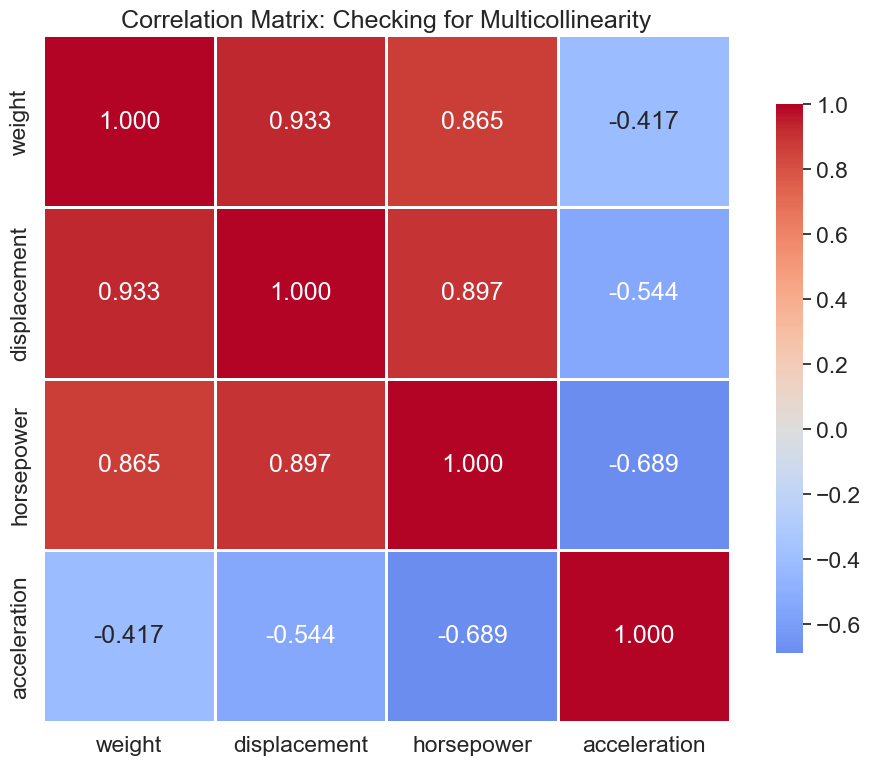


High Correlations (|r| > 0.7):
weight <-> displacement: 0.933
weight <-> horsepower: 0.865
displacement <-> horsepower: 0.897


In [21]:
# Check for multicollinearity by examining correlations between predictors
# High correlations (> 0.7 or < -0.7) indicate potential multicollinearity issues

# Calculate correlation matrix for continuous variables
continuous_variables = ["weight", "displacement", "horsepower", "acceleration"]
correlation_matrix = data[continuous_variables].corr()

# Display the correlation matrix
print("Correlation Matrix of Continuous Variables:")
print("="*60)
print(correlation_matrix.round(3))

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm",
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix: Checking for Multicollinearity")
plt.tight_layout()
plt.show()

# Identify high correlations (excluding diagonal)
print("\n" + "="*60)
print("High Correlations (|r| > 0.7):")
print("="*60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} <-> {var2}: {corr_value:.3f}")

## Dealing with categorical variables

Let's consider the `origin` variable in the Auto MPG dataset, it is a categorical variable with 3 levels: `USA`, `Europe`, and `Asia`.
In the dataset, it is encoded as 1, 2, and 3. However, we can not treat it as a continuous variable, and use it in the linear regression model. 
Instead, we need to convert it to a meaningful representation that can be used in the model.

The most common way to do this is to to create dummy variables for this categorical variable.
With a categorical variable with $k$ levels, we can create $k-1$ dummy variables, and the last level is the baseline.

For example, if we have a categorical variable with 3 levels: `USA`, `Europe`, and `Asia`, we can create 2 dummy variables,
and using `USA` as the baseline (the choice is arbitrary, but we need to be consistent). As such, we can create the following dummy variables:

- `origin_is_europe`
- `origin_is_asia`

whose value will be [1, 0] and [0, 1] for `Europe` and `Asia` respectively. If the value is `USA`, the value will be [0, 0].